In [2]:
import pandas as pd
import re 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/cleaned_tweets.csv')
df

,unnamed: 0,post_text,clean_text,created_at
0,0,It's just over 2 years since I was diagnosed w...,it's just over 2 years since i was diagnosed w...,NaN
1,1,"It's Sunday, I need a break, so I'm planning t...","it's sunday, i need a break, so i'm planning t...",NaN
2,2,Awake but tired. I need to sleep but my brain ...,awake but tired. i need to sleep but my brain ...,NaN
3,3,RT @SewHQ: #Retro bears make perfect gifts and...,rt : retro bears make perfect gifts and are gr...,NaN
4,4,It’s hard to say whether packing lists are mak...,it’s hard to say whether packing lists are mak...,NaN
...,...,...,...,...
20095,20095,@AbnRgr504 @LangmanVince That makes sense...sa...,that makes sense...sad...they should be the on...,2025-06-10 19:44:18+00:00
20096,20096,@stacy_muur @opensea @monad_xyz @aztecnetwork ...,alpha will fucked us,2025-06-10 19:44:18+00:00
20097,20097,@shellshockkk That’s some fucked up shit right...,that’s some fucked up shit right there. how mu...,2025-06-10 19:44:18+00:00
20098,20098,damn ik i look so good that a worker was hitti...,damn ik i look so good that a worker was hitti...,2025-06-10 19:44:17+00:00


In [7]:
df.shape
df = df.drop(columns=['unnamed: 0', 'created_at'], axis=0)


In [8]:
df

,post_text,clean_text
0,It's just over 2 years since I was diagnosed w...,it's just over 2 years since i was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t...","it's sunday, i need a break, so i'm planning t..."
2,Awake but tired. I need to sleep but my brain ...,awake but tired. i need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...,rt : retro bears make perfect gifts and are gr...
4,It’s hard to say whether packing lists are mak...,it’s hard to say whether packing lists are mak...
...,...,...
20095,@AbnRgr504 @LangmanVince That makes sense...sa...,that makes sense...sad...they should be the on...
20096,@stacy_muur @opensea @monad_xyz @aztecnetwork ...,alpha will fucked us
20097,@shellshockkk That’s some fucked up shit right...,that’s some fucked up shit right there. how mu...
20098,damn ik i look so good that a worker was hitti...,damn ik i look so good that a worker was hitti...


## Sentiment Analysis using Vader


In [9]:
analyzer = SentimentIntensityAnalyzer()

In [10]:
def get_sentiment(text):
  score = analyzer.polarity_scores(str(text))
  if score['compound']>=0.05:
    return 'positive'
  elif score['compound'] <= -0.05:
        return 'negative'
  else:
        return 'neutral'

In [11]:
def classify_depression_if_not_news(post_text, clean_text):
    post_text = str(post_text).strip().lower()
    clean_text = str(clean_text).strip().lower()

    news_starters = ['news:', 'breaking', 'report:', 'headline:', 'update:', 'rt', 'notes']
    if any(post_text.startswith(ns) for ns in news_starters):
        return 'undepressed'
    
    keywords = ['depressed', 'hopeless', 'suicidal', 'worthless', 'lifeless',
                'anxious', 'lonely', 'crying', 'empty', 'tired', 'kill myself']
    
    return 'depressed' if any(word in clean_text for word in keywords) else 'undepressed'

In [12]:
df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [13]:
df['mental_health'] = df.apply(lambda row: classify_depression_if_not_news(row['post_text'], row['clean_text']), axis=1)

In [14]:
df

,post_text,clean_text,sentiment,mental_health
0,It's just over 2 years since I was diagnosed w...,it's just over 2 years since i was diagnosed w...,negative,undepressed
1,"It's Sunday, I need a break, so I'm planning t...","it's sunday, i need a break, so i'm planning t...",neutral,undepressed
2,Awake but tired. I need to sleep but my brain ...,awake but tired. i need to sleep but my brain ...,negative,depressed
3,RT @SewHQ: #Retro bears make perfect gifts and...,rt : retro bears make perfect gifts and are gr...,positive,undepressed
4,It’s hard to say whether packing lists are mak...,it’s hard to say whether packing lists are mak...,positive,undepressed
...,...,...,...,...
20095,@AbnRgr504 @LangmanVince That makes sense...sa...,that makes sense...sad...they should be the on...,positive,undepressed
20096,@stacy_muur @opensea @monad_xyz @aztecnetwork ...,alpha will fucked us,negative,undepressed
20097,@shellshockkk That’s some fucked up shit right...,that’s some fucked up shit right there. how mu...,negative,undepressed
20098,damn ik i look so good that a worker was hitti...,damn ik i look so good that a worker was hitti...,negative,undepressed


In [15]:
df['mental_health'].value_counts()

mental_health
undepressed    19955
depressed        145
Name: count, dtype: int64

In [16]:
df.to_csv('data/Tweets_sentiments_dataset.csv',index=False)

OSError: Cannot save file into a non-existent directory: 'data'

In [17]:
depressed_df = df[df['mental_health']=='depressed']
depressed_df

,post_text,clean_text,sentiment,mental_health
2,Awake but tired. I need to sleep but my brain ...,awake but tired. i need to sleep but my brain ...,negative,depressed
259,"#Stressed, tired and rushed: #family https://t...","stressed, tired and rushed: family",negative,depressed
451,"#Kids tired, #stressed and bored: https://t.c...","kids tired, stressed and bored:",negative,depressed
497,"Young, black and depressed? https://t.co/nU9Xl...","young, black and depressed?",negative,depressed
552,Do you suspect any men currently in your life ...,do you suspect any men currently in your life ...,negative,depressed
...,...,...,...,...
17840,@lee6358 Butt is physically still in bed. I'm ...,butt is physically still in bed. i'm so lazy! ...,negative,depressed
20000,@NeriiLune Dreary? But you look so dreamy to m...,"dreary? but you look so dreamy to me,.. ❤️ i h...",positive,depressed
20006,@NaokiQYamamoto Schopenhauer was a depressed d...,schopenhauer was a depressed doomer.,negative,depressed
20065,@sentdefender Isreal needs USA to survive...\n...,isreal needs usa to survive...\n\nattacking ir...,negative,depressed


<Axes: xlabel='sentiment', ylabel='Count'>

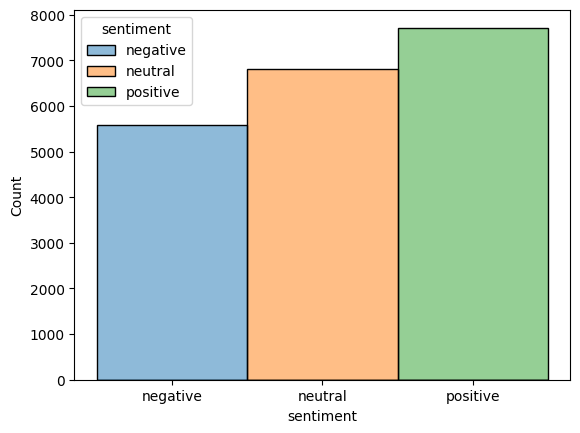

In [18]:
sns.histplot(x=df['sentiment'] ,hue=df['sentiment'] )

Text(0.5, 1.0, 'Depressed vs Undepressed')

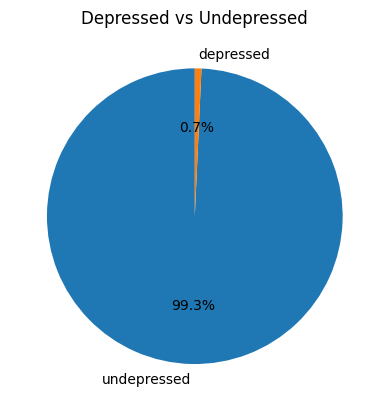

In [19]:


plt.pie(df['mental_health'].value_counts(), labels=df['mental_health'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Depressed vs Undepressed')